# EDA

- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [1]:
# Import Libraries
import numpy as np
import os
import json

import pandas as pd
from pandas import json_normalize

from datetime import datetime


from modules.EDA_Functions import *


## Data Importing

In [2]:
# loading one file first to see what type of data we are dealing with and what attributes it has
AKJ0 = json.load(open(r'../raw_data/AK_Juneau_0.json','r'))

In [3]:
# Explore json list dictionary keys
print(AKJ0.keys())
print(AKJ0['status'])
print(AKJ0['data'].keys())
print(len(AKJ0['data']['results']))
print(AKJ0['data']['results'][0].keys())

dict_keys(['status', 'data'])
200
dict_keys(['total', 'count', 'results'])
8
dict_keys(['primary_photo', 'last_update_date', 'source', 'tags', 'permalink', 'status', 'list_date', 'open_houses', 'description', 'branding', 'list_price', 'lead_attributes', 'property_id', 'photos', 'flags', 'community', 'products', 'virtual_tours', 'other_listings', 'listing_id', 'price_reduced_amount', 'location', 'matterport'])


In [4]:
# Working with data frame for one file
df = json_normalize(AKJ0['data']['results'])

In [5]:
print(f'There are {len(df.columns)} total keys in the AK_Juneau_0.json file\n')
print(df.columns)

There are 64 total keys in the AK_Juneau_0.json file

Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'branding', 'list_price', 'property_id', 'photos',
       'community', 'virtual_tours', 'listing_id', 'price_reduced_amount',
       'matterport', 'primary_photo.href', 'source.plan_id', 'source.agents',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.baths_half', 'description.lot_sqft', 'description.sqft',
       'description.baths', 'description.sub_type', 'description.baths_1qtr',
       'description.garage', 'description.stories', 'description.beds',
       'description.type', 'lead_attributes.show_contact_an_agent',
       'flags.is_new_construction', 'flags.is_for_rent',
       'flags.is_subdivision', 'flags.is_contingent', 'flags.is_price_reduced',
       'flags.

In [6]:
# keep_keys() is a self defined function from modules.EDA_Functions that returns a list of keys that are relevant and can be used in our models 
# Data to be explored further and additional data to be filled and dropped as needed
keepKeys = keep_keys()
print(len(keepKeys))
print(keepKeys)


41
['tags', 'status', 'list_date', 'open_houses', 'description.year_built', 'description.baths_3qtr', 'description.sold_date', 'description.sold_price', 'description.baths_full', 'description.name', 'description.baths_half', 'description.lot_sqft', 'description.sqft', 'description.baths', 'description.sub_type', 'description.baths_1qtr', 'description.garage', 'description.stories', 'description.beds', 'description.type', 'list_price', 'property_id', 'flags.is_new_construction', 'flags.is_for_rent', 'flags.is_subdivision', 'flags.is_contingent', 'flags.is_price_reduced', 'flags.is_pending', 'flags.is_foreclosure', 'flags.is_plan', 'flags.is_coming_soon', 'flags.is_new_listing', 'listing_id', 'price_reduced_amount', 'location.address.postal_code', 'location.address.state', 'location.address.coordinate.lon', 'location.address.coordinate.lat', 'location.address.city', 'location.address.state_code', 'location.address.line']


In [7]:
# Parsing the exploratory file results to return a dataframe with keepKeys columns
AKJ0_df = parse_json_data(AKJ0['data']['results'],keepKeys)
AKJ0_df.head()

,tags,status,list_date,open_houses,list_price,property_id,listing_id,price_reduced_amount,description.year_built,description.baths_3qtr,...,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"[carport, community_outdoor_space, cul_de_sac,...",sold,2023-06-29T21:16:25.000000Z,None,554950.0,9074430767,2957241843,45000.0,1963.0,None,...,None,None,False,99801,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,None,sold,None,None,NaN,9424983842,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,None,sold,None,None,NaN,9479068516,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,None,sold,None,None,NaN,9879331943,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,None,sold,None,None,NaN,9521639574,None,NaN,NaN,None,...,None,None,None,99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [8]:
import warnings

# Filter out FutureWarning related to deprecated behavior in pandas
warnings.filterwarnings('ignore', category=FutureWarning, module='pandas')

In [9]:
# loop over all files and combine to dataframe
directory = r'../raw_data'

keepKeys = keep_keys()
housingData = pd.DataFrame(columns=keepKeys)

for file in os.listdir(directory):
    if file != '.gitkeep':
        result = json.load(open(rf'{directory}/{file}'))

        df = parse_json_data(result['data']['results'],keepKeys)
        housingData = pd.concat([housingData,df],ignore_index=True)

C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3443903257.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  housingData = pd.concat([housingData,df],ignore_index=True)
C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3443903257.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  housingData = pd.concat([housingData,df],ignore_index=True)
C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3443903257.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is 

In [10]:
housingData.head()

,tags,status,list_date,open_houses,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"[carport, community_outdoor_space, cul_de_sac,...",sold,2023-06-29T21:16:25.000000Z,None,1963.0,NaN,2023-09-18,None,2.0,None,...,False,2957241843,45000.0,99801,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,None,sold,None,None,NaN,NaN,2023-08-22,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,None,sold,None,None,NaN,NaN,2023-08-22,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,None,sold,None,None,NaN,NaN,2023-08-21,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,None,sold,None,None,NaN,NaN,2023-08-21,None,NaN,None,...,None,None,NaN,99801,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [11]:
# Save dataframe to csv
housingData.to_csv('../data/housingDataRaw.csv',index=False)

## Data Cleaning and Wrangling

At this point, ensure that you have all sales in a dataframe.
- Take a quick look at your data (i.e. `.info()`, `.describe()`) - what do you see?
- Is each cell one value, or do some cells have lists?
- What are the data types of each column?
- Some sales may not actually include the sale price (target).  These rows should be dropped.
- There are a lot of NA/None values.  Should these be dropped or replaced with something?
    - You can drop rows or use various methods to fills NA's - use your best judgement for each column 
    - i.e. for some columns (like Garage), NA probably just means no Garage, so 0
- Drop columns that aren't needed
    - Don't keep the list price because it will be too close to the sale price. Assume we want to predict the price of houses not yet listed

In [12]:
# load raw housing data csv 
housingData = pd.read_csv('../data/housingDataRaw.csv')

In [13]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8191 entries, 0 to 8190
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             7638 non-null   object 
 1   status                           8159 non-null   object 
 2   list_date                        7752 non-null   object 
 3   open_houses                      0 non-null      float64
 4   description.year_built           7316 non-null   float64
 5   description.baths_3qtr           566 non-null    float64
 6   description.sold_date            8159 non-null   object 
 7   description.sold_price           6716 non-null   float64
 8   description.baths_full           7311 non-null   float64
 9   description.name                 0 non-null      float64
 10  description.baths_half           2281 non-null   float64
 11  description.lot_sqft             6991 non-null   float64
 12  description.sqft    

In [14]:
housingData.describe()

,open_houses,description.year_built,description.baths_3qtr,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,...,flags.is_subdivision,flags.is_contingent,flags.is_pending,flags.is_plan,flags.is_coming_soon,listing_id,price_reduced_amount,location.address.postal_code,location.address.coordinate.lon,location.address.coordinate.lat
count,0.0,7316.000000,566.000000,6.716000e+03,7311.000000,0.0,2281.000000,6.991000e+03,7323.000000,7980.000000,...,0.0,0.0,0.0,0.0,0.0,7.752000e+03,2.484000e+03,8159.000000,7909.000000,7909.000000
mean,NaN,1968.916074,1.247350,4.126050e+05,1.887430,NaN,1.105655,2.510949e+05,1933.848559,2.131203,...,NaN,NaN,NaN,NaN,NaN,2.957819e+09,2.442704e+04,50946.997181,-92.206522,39.009689
std,NaN,35.096914,0.463482,6.994308e+05,0.862214,NaN,0.413340,5.823820e+06,1339.039206,1.175940,...,NaN,NaN,NaN,NaN,NaN,7.541620e+07,7.162396e+04,29257.110670,15.888886,4.374553
min,NaN,1828.000000,1.000000,3.080000e+02,1.000000,NaN,1.000000,0.000000e+00,120.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,6.052327e+08,1.000000e+02,2111.000000,-157.810583,21.277707
25%,NaN,1950.000000,1.000000,1.910000e+05,1.000000,NaN,1.000000,4.953000e+03,1258.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,2.959499e+09,6.000000e+03,25314.000000,-104.971611,35.688084
50%,NaN,1975.000000,1.000000,3.140000e+05,2.000000,NaN,1.000000,7.841000e+03,1635.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,2.960836e+09,1.010000e+04,50310.000000,-89.333131,39.698210
75%,NaN,1997.000000,1.000000,4.700000e+05,2.000000,NaN,1.000000,1.263200e+04,2264.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,2.961805e+09,2.000000e+04,78739.000000,-78.617690,41.832266
max,NaN,2024.000000,3.000000,2.706500e+07,8.000000,NaN,5.000000,1.676624e+08,32106.000000,9.000000,...,NaN,NaN,NaN,NaN,NaN,2.963230e+09,2.015999e+06,99801.000000,-71.006343,58.396178


In [15]:
housingData.head()

,tags,status,list_date,open_houses,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,...,flags.is_new_listing,listing_id,price_reduced_amount,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line
0,"['carport', 'community_outdoor_space', 'cul_de...",sold,2023-06-29T21:16:25.000000Z,NaN,1963.0,NaN,2023-09-18,NaN,2.0,NaN,...,False,2.957242e+09,45000.0,99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl
1,NaN,sold,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd
2,NaN,sold,NaN,NaN,NaN,NaN,2023-08-22,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy
3,NaN,sold,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd
4,NaN,sold,NaN,NaN,NaN,NaN,2023-08-21,NaN,NaN,NaN,...,NaN,NaN,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr


In [16]:
housingData.shape

(8191, 41)

In [17]:
# Dropping all rows with no sold price as they cannot be used with supervised learning.
housingData.dropna(subset=['description.sold_price'],inplace=True)

In [18]:
# Getting columns that are completely empty
columnCount = housingData.describe().loc['count']
emptyColumns = columnCount[columnCount == 0].index
print(f'Empty Columns: {emptyColumns}')

# Dropping empty columns
housingData.drop(columns=emptyColumns,inplace=True)

Empty Columns: Index(['open_houses', 'description.name', 'description.baths_1qtr',
       'flags.is_new_construction', 'flags.is_for_rent',
       'flags.is_subdivision', 'flags.is_contingent', 'flags.is_pending',
       'flags.is_plan', 'flags.is_coming_soon'],
      dtype='object')


In [19]:
# Finding the columns with null or nan values that need to be reconciled
housingData.columns[housingData.isnull().any()]

Index(['tags', 'list_date', 'description.year_built', 'description.baths_3qtr',
       'description.baths_full', 'description.baths_half',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.sub_type', 'description.garage', 'description.stories',
       'description.beds', 'description.type', 'list_price',
       'flags.is_price_reduced', 'flags.is_foreclosure',
       'flags.is_new_listing', 'listing_id', 'price_reduced_amount',
       'location.address.coordinate.lon', 'location.address.coordinate.lat',
       'location.address.city', 'location.address.line'],
      dtype='object')

### Dealing with NA/Nulls

In [20]:
# Assuming everything that has a sold_price has been sold, status is redundant as the only information is 'sold'
print(housingData['status'].unique())
housingData.drop(columns='status',inplace=True)

['sold']


In [21]:
# location.address.city
# Filling a lot of missing values with average values by city, so drop missing cities
housingData.dropna(subset=['location.address.city'], inplace=True)

In [22]:
# list_date
# Getting average list_date for each city, and filling NA with that average
housingData['list_date'] = pd.to_datetime(housingData['list_date'], format='ISO8601')
avg_date_by_city = housingData.groupby('location.address.city')['list_date'].transform('mean')
housingData['list_date'] = housingData['list_date'].fillna(avg_date_by_city)

# Dropping remaining NA comlumns and converting column type to timestamp
housingData.dropna(subset=['list_date'],inplace=True)
housingData['list_date'] = housingData['list_date'].apply(lambda x: int(x.timestamp()))

In [23]:
# convert sold_date to timestamp
housingData['description.sold_date'] = pd.to_datetime(housingData['description.sold_date'], format='ISO8601')
housingData.dropna(subset=['description.sold_date'],inplace=True)
housingData['description.sold_date'] = housingData['description.sold_date'].apply(lambda x: int(x.timestamp()))

In [24]:
# year_built
# Getting average year_built for each city, and filling NA with that average
avg_yearbuilt_by_city = housingData.groupby('location.address.city')['description.year_built'].transform('mean')
housingData['description.year_built'] = housingData['description.year_built'].fillna(avg_yearbuilt_by_city)
housingData.dropna(subset=['description.year_built'], inplace=True)

In [25]:
# description columns
# Column to fill NA/null values with 0
fill0Columns = ['description.baths_3qtr', 'description.baths_full', 'description.baths_half', 'description.baths', 'description.garage', 'description.beds']

# Fill NA/null values for stories with 1
for column in fill0Columns:
    housingData[column].fillna(0, inplace=True)

housingData['description.stories'].fillna(0, inplace=True)

C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3467751644.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housingData[column].fillna(0, inplace=True)
C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3467751644.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [26]:
# Lot_sqft and sqft
# Fill null values in Sqft column with the avg sqft by Description Type
avg_by_type = housingData.groupby('description.type')['description.sqft'].transform('mean')
housingData['description.sqft'] = housingData['description.sqft'].fillna(avg_by_type)

# Fill null values in Lot Sqft column with the avg lot sqft by Location City
avg_by_city = housingData.groupby('location.address.city')['description.lot_sqft'].transform('mean')
housingData['description.lot_sqft'] = housingData['description.lot_sqft'].fillna(avg_by_city)

# dropping any remaining NA that could not be filled
housingData.dropna(subset=['description.lot_sqft','description.sqft'],inplace=True)

In [27]:
# list_price
# Getting the average listprice by city and filling NA/Null values in list_price
avgListPriceCity = housingData.groupby('location.address.city')['list_price'].transform('mean')
housingData['list_price'] = housingData['list_price'].fillna(avgListPriceCity) # Fill NaN values in 'list_price' with the average sale price by city

# Append city avg list price, this will be used as an representation of city in models
housingData['cityListPrice'] = avgListPriceCity

# Drop any remainining NA values that could not be filled. 
housingData.dropna(subset=['list_price'],inplace=True)



In [28]:
# is_price_reduced
# Drop column as filled values do not make sense with data and too many missing values.
housingData.drop(columns=['flags.is_price_reduced'], inplace=True) 

In [29]:
# flags.is_foreclosure
# If NA/Null then not foreclosure, so fill values with False
housingData['flags.is_foreclosure'] = housingData['flags.is_foreclosure'].fillna(False) 

C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3633171727.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  housingData['flags.is_foreclosure'] = housingData['flags.is_foreclosure'].fillna(False)


In [30]:
# flags.is_new_listing
# Have no listing date and all existing values are False. Drop column.
housingData.drop(columns=['flags.is_new_listing'], inplace=True)

In [31]:
# listing_id
# If there is not listing ID assign Zero as this feature should not be important for analysis 
housingData['listing_id'] = housingData['listing_id'].fillna(0) 

In [32]:
# price_reduced_amount
# If its not reduced then it should be zero
housingData['price_reduced_amount'].fillna(0, inplace=True) 

C:\Users\kool3\AppData\Local\Temp\ipykernel_8172\3411360596.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housingData['price_reduced_amount'].fillna(0, inplace=True)


In [33]:
# Lat Long
# Get the average longitude and latitude by city
avgLongitude = housingData.groupby('location.address.city')['location.address.coordinate.lon'].transform('mean')
avgLatitude = housingData.groupby('location.address.city')['location.address.coordinate.lat'].transform('mean')

housingData['location.address.coordinate.lon'] = housingData['location.address.coordinate.lon'].fillna(avgLongitude) # fill in Nan values with avg longitude of the city
housingData['location.address.coordinate.lat'] = housingData['location.address.coordinate.lat'].fillna(avgLatitude) # fill in Nan values with avg latitude of the city

## Some cities do not have a lat long so we cannot get the mean, we will drop these rows (22) for now. In the future we can get this lat long data from an online sourse.
housingData.dropna(subset=['location.address.coordinate.lat','location.address.coordinate.lon'], inplace=True)

In [34]:
# location.address.line
# Not planning to go to this level of detail and difficult to use for models. Dropping
housingData.drop(columns=['location.address.line'], inplace=True)

In [35]:
# state and state_code
# One is redundant, drop state_code
housingData.drop(columns=['location.address.state_code'], inplace=True)

In [36]:
# Type and Sub-type
print(housingData['description.type'].value_counts())
print(f'\n{housingData["description.sub_type"].value_counts()}')

# Combine low frequency types. Map data duplex_triplex, condo_townhome_rowhome_coop to other.
housingData['description.type'] = housingData['description.type'].replace({
    'condo_townhome_rowhome_coop': 'other_types',
    'duplex_triplex': 'other_types'
})

housingData['description.type'] = housingData['description.type'].fillna('other_types') 

# sub-type does not provide much info and has many nulls, drop sub-type
housingData.drop(columns=['description.sub_type'],inplace=True)

description.type
single_family                  4479
condos                          646
townhomes                       486
multi_family                    486
land                            251
mobile                          137
condo                            52
apartment                        20
condo_townhome_rowhome_coop       5
Name: count, dtype: int64

description.sub_type
condo        666
townhouse    491
Name: count, dtype: int64


In [37]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6562 entries, 30 to 8185
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tags                             6277 non-null   object 
 1   list_date                        6562 non-null   int64  
 2   description.year_built           6562 non-null   float64
 3   description.baths_3qtr           6562 non-null   float64
 4   description.sold_date            6562 non-null   int64  
 5   description.sold_price           6562 non-null   float64
 6   description.baths_full           6562 non-null   float64
 7   description.baths_half           6562 non-null   float64
 8   description.lot_sqft             6562 non-null   float64
 9   description.sqft                 6562 non-null   float64
 10  description.baths                6562 non-null   float64
 11  description.garage               6562 non-null   float64
 12  description.stories     

### Dealing with Tags and Housing Types

In [38]:
#Calculate word frequencies in the 'tags' column
word_freq = count_word_frequencies(housingData, 'tags')

In [39]:
#Sorting tags by frequency
sorted_word_freq_by_values = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
sorted_word_freq_by_values

{'garage_1_or_more': 3758,
 'central_air': 3401,
 'community_outdoor_space': 3117,
 'dishwasher': 2965,
 'basement': 2916,
 'fireplace': 2728,
 'forced_air': 2691,
 'single_story': 2648,
 'two_or_more_stories': 2606,
 'garage_2_or_more': 2487,
 'hardwood_floors': 2175,
 'washer_dryer': 1834,
 'laundry_room': 1829,
 'shopping': 1595,
 'recreation_facilities': 1506,
 'dining_room': 1354,
 'view': 1309,
 'community_security_features': 1305,
 'central_heat': 1079,
 'family_room': 1019,
 'city_view': 1018,
 'fenced_yard': 989,
 'floor_plan': 809,
 'big_lot': 797,
 'new_roof': 747,
 'rental_property': 721,
 'updated_kitchen': 670,
 'community_swimming_pool': 598,
 'ensuite': 579,
 'farm': 560,
 'corner_lot': 517,
 'ranch': 496,
 'big_yard': 478,
 'energy_efficient': 471,
 'modern_kitchen': 460,
 'open_floor_plan': 454,
 'carport': 436,
 'park': 422,
 'front_porch': 400,
 'high_ceiling': 391,
 'garage_3_or_more': 390,
 'trails': 372,
 'disability_features': 350,
 'master_bedroom': 341,
 'view

In [40]:
# Sorting by freq and taking the top 16 tags to OHE
sorted_tags = sorted(word_freq, key=word_freq.get, reverse=True)[0:16]

In [41]:
# Fill nan with empty string for one_hot_encode_tags function
housingData['tags'] = housingData['tags'].fillna('')

In [42]:
housingData.reset_index(inplace=True)

In [43]:
# Creating a dataframe of the encided tags
encodedTagsList = []
for row in housingData['tags']:
    encodedTagsList.append(one_hot_encode_tags(row,sorted_tags))

encodedTagsDF = pd.DataFrame(encodedTagsList)

In [44]:
# Appending tags to housingData and dropping tags columns
housingData = pd.concat([housingData,encodedTagsDF],axis=1)
housingData.drop(columns=['tags'],inplace=True)


In [45]:
# OHE the types columns, low frequency types have already been combined to 'other types' in earlier processing.
oheDF = pd.get_dummies(housingData['description.type'])

housingData = pd.concat([housingData,oheDF],axis=1)
housingData.drop(columns=['description.type'],inplace=True)

In [46]:
# Final housingData cleaned
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6562 entries, 0 to 6561
Data columns (total 51 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            6562 non-null   int64  
 1   list_date                        6562 non-null   int64  
 2   description.year_built           6562 non-null   float64
 3   description.baths_3qtr           6562 non-null   float64
 4   description.sold_date            6562 non-null   int64  
 5   description.sold_price           6562 non-null   float64
 6   description.baths_full           6562 non-null   float64
 7   description.baths_half           6562 non-null   float64
 8   description.lot_sqft             6562 non-null   float64
 9   description.sqft                 6562 non-null   float64
 10  description.baths                6562 non-null   float64
 11  description.garage               6562 non-null   float64
 12  description.stories 

### Dealing with Cities

- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- What we can do is use our training data to encode the mean sale price by city as a feature (a.k.a. Target Encoding)
    - We can do this as long as we ONLY use the training data - we're using the available data to give us a 'starting guess' of the price for each city, without needing to encode city explicitly
- If you replace cities or states with numerical values (like the mean price), make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Note that you *may* have cities in the test set that are not in the training set. You don't want these to be NA, so maybe you can fill them with the overall mean

## Extra Data - STRETCH

> This doesn't need to be part of your Minimum Viable Product (MVP). We recommend you write a functional, basic pipeline first, then circle back and join new data if you have time

> If you do this, try to write your downstream steps in a way it will still work on a dataframe with different features!

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [47]:
# import, join and preprocess new data here

## EDA/ Visualization

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.    
    - Consider transforming very skewed variables
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
    - You may have too many features to do this, in which case you can simply compute the most correlated feature-pairs and list them
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# perform EDA here
numerical_cols = housingData.select_dtypes(include=['number']).columns.tolist()

<Axes: >

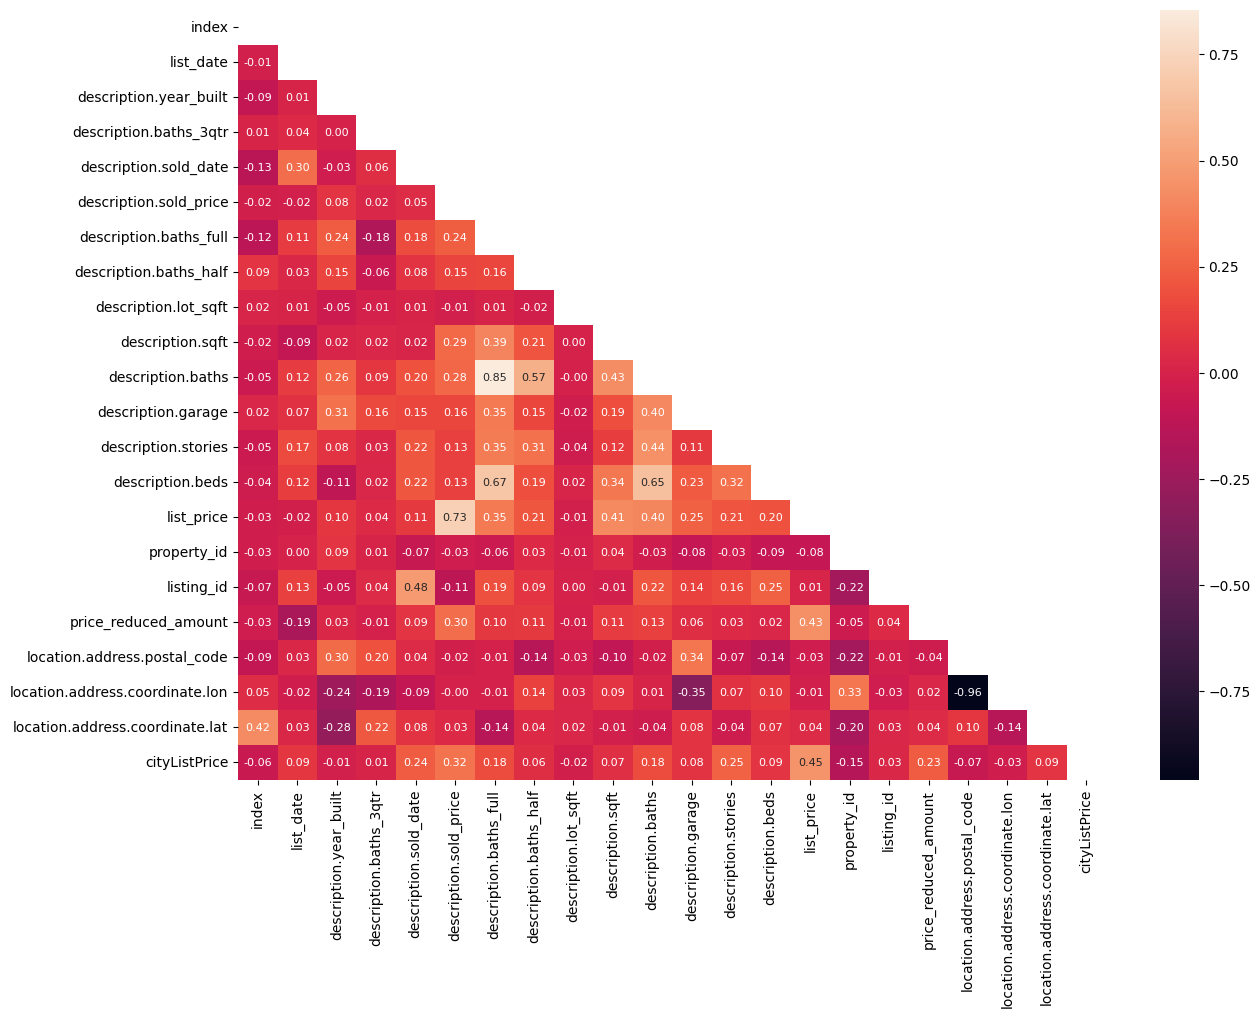

In [50]:
# Correlation heatmap of numerical
plt.figure(figsize=(14, 10))
sns.heatmap(
    housingData[numerical_cols].corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(housingData[numerical_cols].corr(), dtype=bool))
)

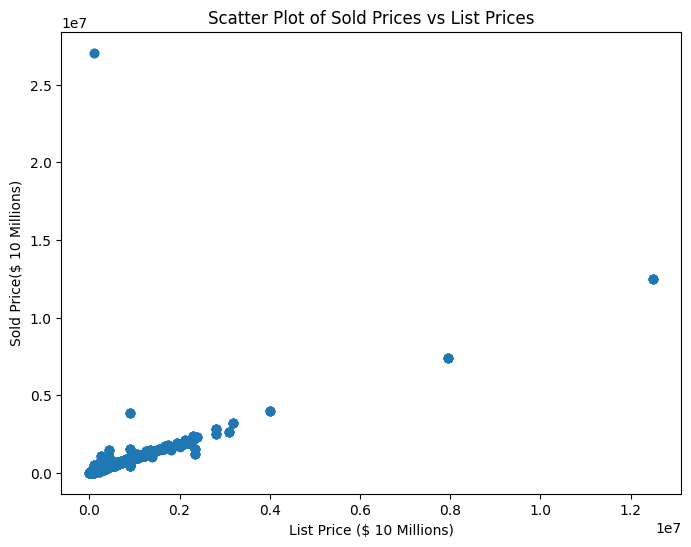

In [51]:
# Scatter plot of Sold Prices vs Lsit Prices
x= housingData['list_price']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs List Prices')
plt.xlabel('List Price ($ 10 Millions)')
plt.ylabel('Sold Price($ 10 Millions)')
plt.show()

In [52]:
# Remove outliers with sold prices greater than $3.5M dollars
housingData = housingData[housingData['description.sold_price'] <= 3500000]

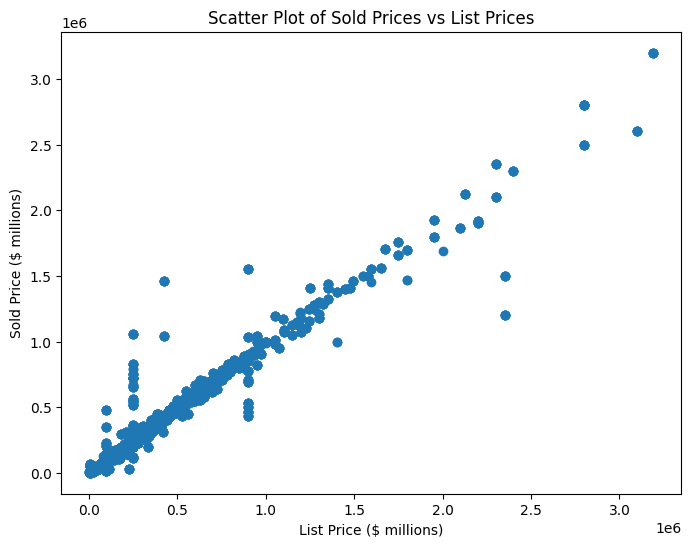

In [53]:
# Outliers removed
x= housingData['list_price']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs List Prices')
plt.xlabel('List Price ($ millions)')
plt.ylabel('Sold Price ($ millions)')
plt.show()

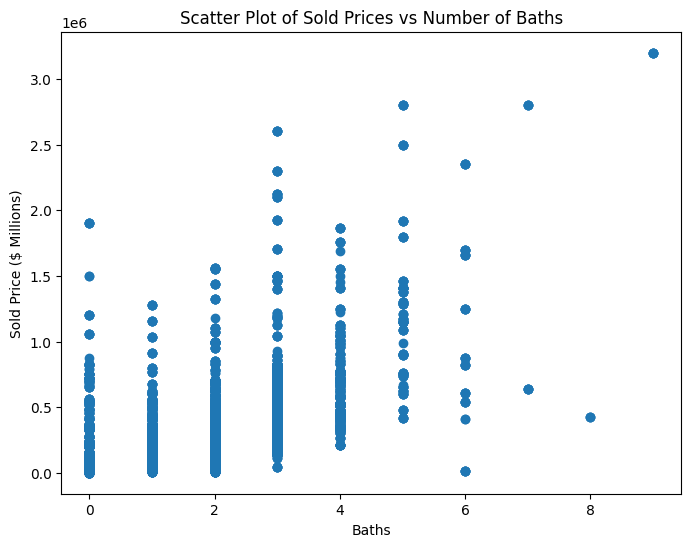

In [54]:
# Scatter plot of Sold Prices vs Number of Baths
x= housingData['description.baths']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Number of Baths')
plt.xlabel('Baths')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

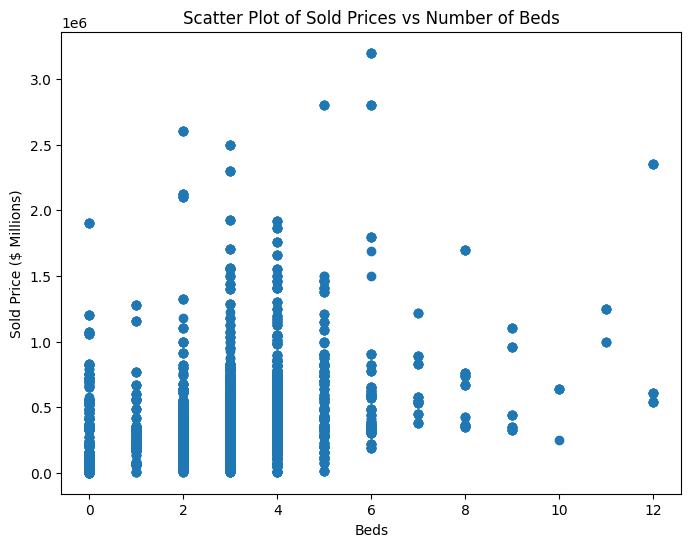

In [55]:
# Scatter plot of Sold Prices vs Number of Beds
x= housingData['description.beds']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Number of Beds')
plt.xlabel('Beds')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

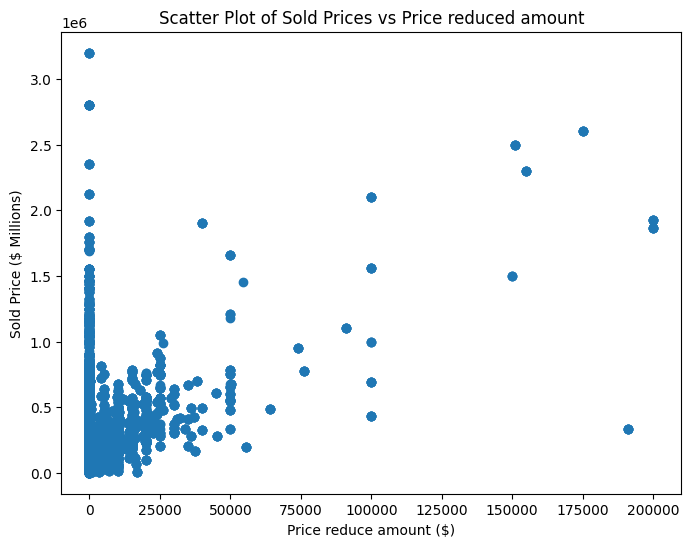

In [56]:
# Scatter plot of Sold Prices vs Price Reduced Amount
x= housingData['price_reduced_amount']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Price reduced amount')
plt.xlabel('Price reduce amount ($)')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

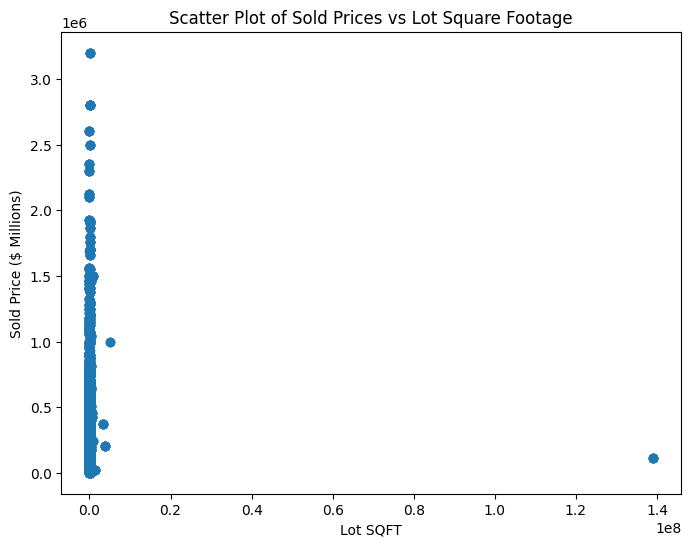

In [57]:
# Scatter plot of Sold Prices vs Lot Sqft
x= housingData['description.lot_sqft']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Lot Square Footage')
plt.xlabel('Lot SQFT')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

In [58]:
# Remove outliers with lot square footage greater than $200,000 sqft
housingData = housingData[housingData['description.lot_sqft'] <= 800000]

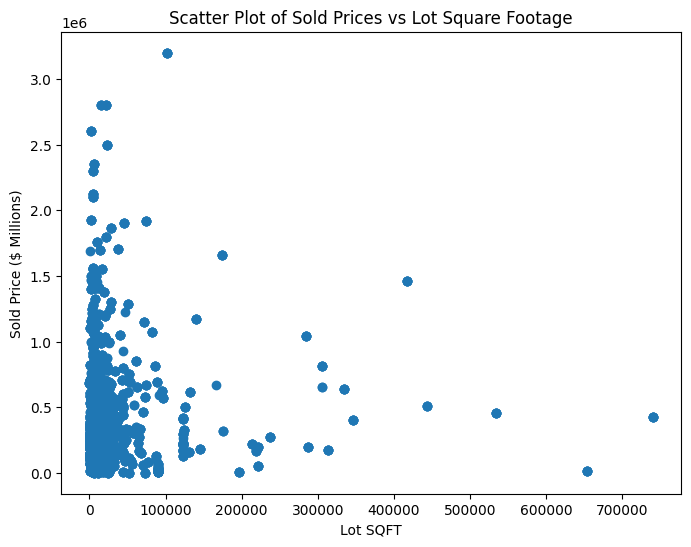

In [59]:
# Outliers removed
x= housingData['description.lot_sqft']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Lot Square Footage')
plt.xlabel('Lot SQFT')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

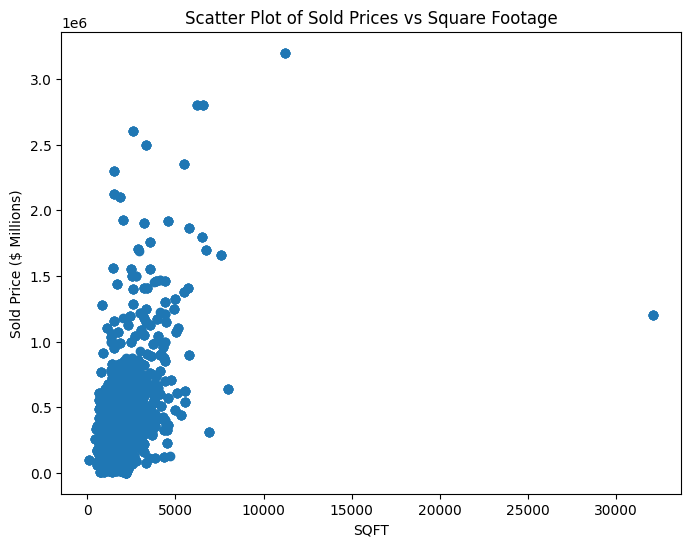

In [60]:
# Scatter plot of Sold Prices vs sqft
x= housingData['description.sqft']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Square Footage')
plt.xlabel('SQFT')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

In [61]:
# Remove outliers with square footage greater than 10,000
housingData = housingData[housingData['description.sqft'] <= 10000]

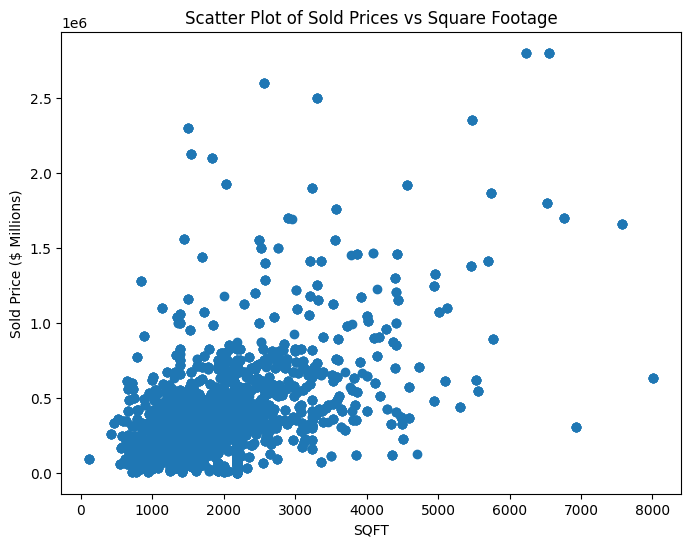

In [62]:
# Outliers removed
x= housingData['description.sqft']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Square Footage')
plt.xlabel('SQFT')
plt.ylabel('Sold Price ($ Millions)')
plt.show()

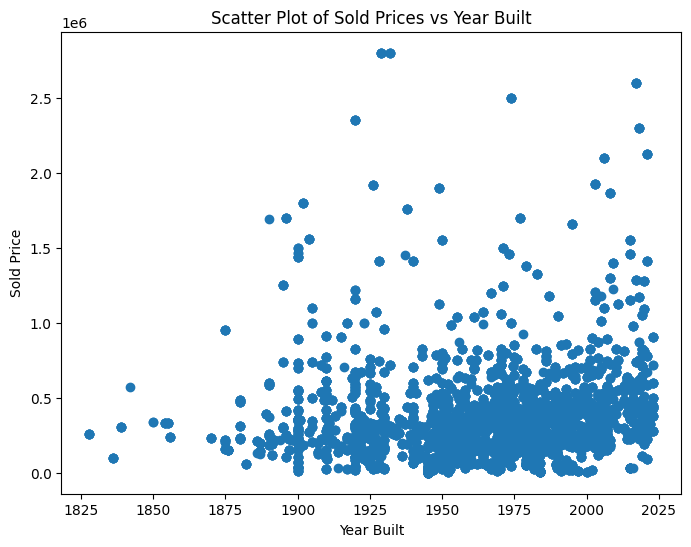

In [63]:
# Scatter plot of Sold Prices vs Year Built
x= housingData['description.year_built']
y= housingData['description.sold_price']
plt.figure(figsize=(8, 6))
plt.scatter(x,y)
plt.title('Scatter Plot of Sold Prices vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('Sold Price')
plt.show()

In [64]:
housingData['description.sold_price'].describe()

count    6.500000e+03
mean     3.800570e+05
std      3.236420e+05
min      3.080000e+02
25%      1.900000e+05
50%      3.100000e+05
75%      4.652500e+05
max      2.800000e+06
Name: description.sold_price, dtype: float64

In [65]:
# To remove target variable (sold price) from list of numerical columns
num_cols_without_sold_price = numerical_cols.copy()
num_cols_without_sold_price.remove('description.sold_price')

<Axes: >

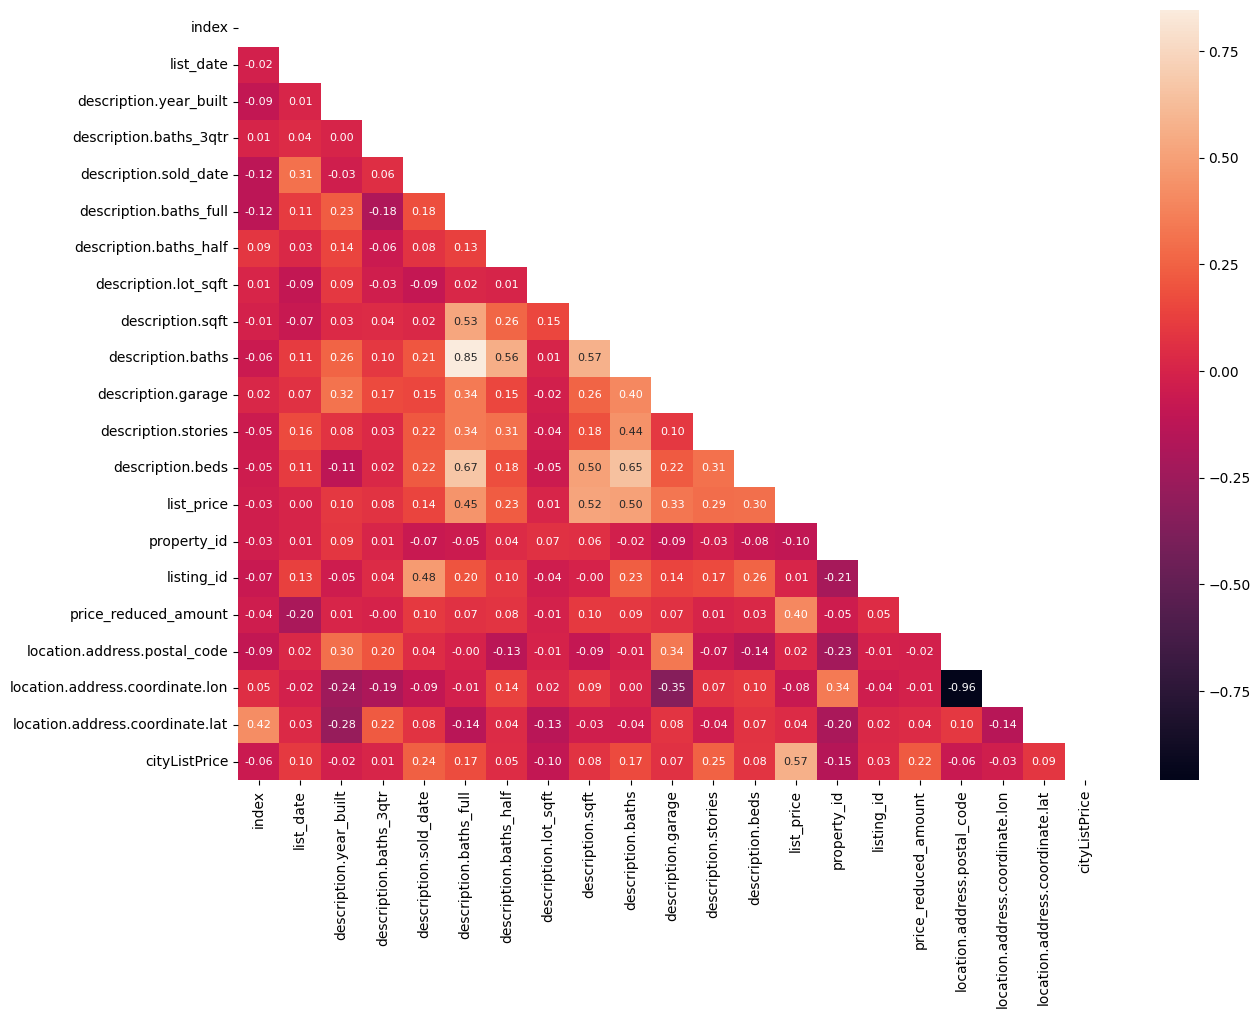

In [66]:
# To determine the correlation between numerical variables(less target variable) to detect highly correlated features that we may want to drop
plt.figure(figsize=(14, 10))
sns.heatmap(
    housingData[num_cols_without_sold_price].corr(),
    annot=True,
    annot_kws={'size':8},
    fmt=".2f",
    mask=np.triu(np.ones_like(housingData[num_cols_without_sold_price].corr(), dtype=bool)))

In [67]:
# Description.baths is highly correlated with description.baths.full with a correlation of 0.85. Column Baths.full to be dropped.
# Postal code is also highly correlated with longitude. Can be dropped.
housingData = housingData.drop(columns=['description.baths_full', 'location.address.postal_code'])

In [68]:
housingData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6500 entries, 0 to 6561
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            6500 non-null   int64  
 1   list_date                        6500 non-null   int64  
 2   description.year_built           6500 non-null   float64
 3   description.baths_3qtr           6500 non-null   float64
 4   description.sold_date            6500 non-null   int64  
 5   description.sold_price           6500 non-null   float64
 6   description.baths_half           6500 non-null   float64
 7   description.lot_sqft             6500 non-null   float64
 8   description.sqft                 6500 non-null   float64
 9   description.baths                6500 non-null   float64
 10  description.garage               6500 non-null   float64
 11  description.stories              6500 non-null   float64
 12  description.beds         

In [69]:
# Saving housingData to csv
housingData.to_csv('../data/housingData.csv',index=False)

## Train, Test and Split before scaling final dataset

In [70]:
# Dropping remaining object columns. 
# cityListPrice column can act as a representation of the City
# State was was considered redundant as we already had cityListPrice column created.
housingData.drop(columns=['location.address.city','location.address.state'], inplace=True)

In [71]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housingData.drop(columns=['description.sold_price']), housingData['description.sold_price'], test_size=0.2, random_state=42)

## Scaling and Finishing Up

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,-1.251233,-0.370697,-0.017168,2.935799,-0.363107,-0.596476,-0.162262,0.889618,0.779962,0.864310,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,0.682662,-0.283562
1,0.635360,0.142888,-1.047624,-0.232768,0.213207,-0.596476,-0.295241,-0.341250,-0.086848,0.003641,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,0.682662,-0.283562
2,0.881117,0.362689,-0.532396,-0.232768,0.213207,-0.596476,-0.190742,-0.806527,-0.953657,0.003641,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,0.682662,-0.283562
3,0.829508,0.384532,1.614389,-0.232768,0.564007,-0.596476,-0.180425,-0.621473,-0.086848,0.864310,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,0.682662,-0.283562
4,1.095744,-0.106781,-1.076248,-0.232768,0.388607,3.127024,0.075697,4.936468,2.513580,0.864310,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,0.682662,-0.283562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,0.288843,0.606309,1.041913,2.935799,0.513893,-0.596476,-0.314388,0.572384,0.779962,0.864310,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,-1.464853,3.526570
5196,0.992527,0.667846,-1.791843,-0.232768,0.463779,-0.596476,-0.361731,0.267839,-1.820466,-0.857027,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,3.478252,-0.024026,-1.464853,-0.283562
5197,1.006862,0.732002,-0.045791,-0.232768,0.513893,-0.596476,-0.209757,-0.419501,-0.086848,-0.857027,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,-0.287501,-0.024026,0.682662,-0.283562
5198,1.075674,0.050321,-1.333862,-0.232768,0.513893,-0.596476,-0.317659,0.794448,0.779962,-0.857027,...,0.32508,-0.053786,-0.089147,-0.328684,-0.195803,-0.147688,3.478252,-0.024026,-1.464853,-0.283562


In [74]:
# Saving processed data to csv
pd.DataFrame(X_train_scaled).to_csv('../data/processed/X_train_scaled.csv', index=False)
pd.DataFrame(X_test_scaled).to_csv('../data/processed/X_test_scaled.csv', index=False)
pd.DataFrame(y_train).to_csv('../data/processed/y_train.csv', index=False)
pd.DataFrame(y_test).to_csv('../data/processed/y_test.csv', index=False)